### Obtaining a dataset

For this exercise we'll use a dataset from the Machine Learning Repository hosted by The University of California att Irvine. You can view the complete repository [here](https://archive.ics.uci.edu/ml/index.php). We'll be using the __Adult__ dataset, which contains information from the 1994 US census. The fields in the dataset are

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Income level: <=50K or >50K

We can use this dataset to investigate and graph out various things, using Numpy and matplotlib.

In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from io import StringIO

raw_data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').text
raw_data = raw_data.replace(", ", ",")
data = raw_data.split("\n")
print(raw_data[:100])

39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United


The data is in CSV format. We can store this in a numpy matrix using the `genfromtxt` method. This method, per the documentation, requires that the input be a filename, a generator, or a list of string. A generator or a list will work equally well here.

In [2]:
dataset = np.genfromtxt(data, dtype=str, encoding=str, delimiter=',')
print(dataset[0])

['39' 'State-gov' '77516' 'Bachelors' '13' 'Never-married' 'Adm-clerical'
 'Not-in-family' 'White' 'Male' '2174' '0' '40' 'United-States' '<=50K']


### Analyzing the Data

Now that we have the dataset we can being our analysis. To start with, try counting the number of people with a bachelors degree (or higher) that have an income level above \\$50,000 and how many have an income level less than \\$50,000, and creating a simple bar chart illustrating the difference.

In [16]:
higherEd = (dataset[:,3] == 'Bachelors') | (dataset[:,3] == 'Doctorate') |  (dataset[:,3] == 'Masters')   
under50 = (dataset[:,14] == '<=50K')
over50 = (dataset[:,14] == '>50K')

%time print(dataset[higherEd & under50].shape[0])
%time print(np.sum(higherEd & under50))

print("\n\n")

%time print(dataset[higherEd & over50].shape[0])
%time print(np.sum(higherEd & over50))

4005
CPU times: user 3.17 ms, sys: 0 ns, total: 3.17 ms
Wall time: 2.41 ms
4005
CPU times: user 487 µs, sys: 283 µs, total: 770 µs
Wall time: 574 µs



3486
CPU times: user 2.86 ms, sys: 0 ns, total: 2.86 ms
Wall time: 1.98 ms
3486
CPU times: user 513 µs, sys: 10 µs, total: 523 µs
Wall time: 417 µs


Next, determine which of the occupations is the most likely to net you more than \\$50,000 a year, and graph the results


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

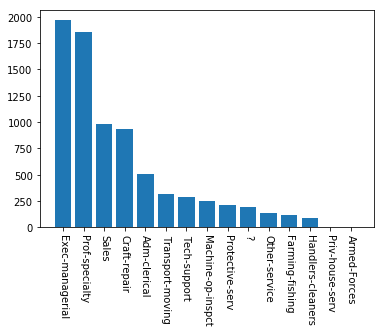

In [20]:
u, counts = np.unique(dataset[over50][:,6], return_counts=True)
sortorder = np.argsort(counts)[::-1]
plt.bar(u[sortorder], counts[sortorder])
plt.xticks(rotation=-90)

Finally, determine whether marital status is a significant factor in determining income level

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

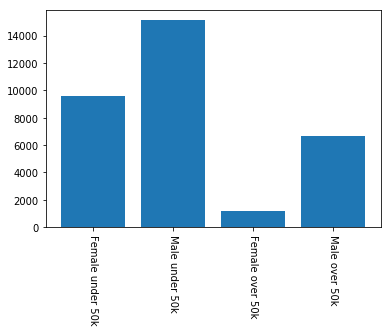

In [22]:
male = (dataset[:,9] == 'Male')
female = (dataset[:,9] == 'Female')
under50 = (dataset[:,14] == '<=50K')
over50 = (dataset[:,14] == '>50K')

mo50 = np.sum(male & over50)
mu50 = np.sum(male & under50)
fo50 = np.sum(female & over50)
fu50 = np.sum(female & under50)

x = [fu50, mu50, fo50, mo50]
h = ["Female under 50k", "Male under 50k", "Female over 50k", "Male over 50k"]
plt.bar(h,x)
plt.xticks(rotation=-90)

Heatmap income level concentrations by profession

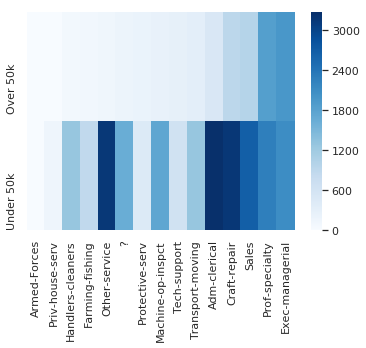

In [38]:
d = dataset[over50][:,6]
u, counts = np.unique(d, return_counts=True)
sortorder = np.argsort(counts)

d = dataset[under50][:,6]
u2, counts2 = np.unique(d, return_counts=True)

hmdata = [counts[sortorder], counts2[sortorder]]
import seaborn as sns
sns.set()

sns.heatmap(hmdata, xticklabels=u[sortorder], yticklabels=["Over 50k", "Under 50k"], cmap="Blues")